### Note:
###### This EDA is performed on cleaned data that was collected from twitter between (~April ~June). To look at the EDA on uncleaned data go [here](tweets_text_EDA.ipynb). To look at the preprocessing steps look [here](preprocessing.py)

In [26]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import datetime
from src.preprocessing import text_pipe
from src.db_handler import retrieve_all_data
from wordcloud.wordcloud import WordCloud, STOPWORDS

In [27]:
rcParams['figure.figsize'] = (15, 10)
sns.set(font_scale=1.5)
sns.set_theme(context='talk', style='whitegrid')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [28]:
# extracting table from the database
df = pd.DataFrame(retrieve_all_data(), columns=['tweet_created', 'conversation_id', 'tweet_id', 'author_id', 'text', 'retweet_count', 'reply_count', 'like_count', 'quote_count', 'account_created', 'account_id', 'name', 'verified', 'follower_count', 'following_count', 'tweet_count', 'listed_count'])

Rows have been retrieved


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88053 entries, 0 to 88052
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_created    88053 non-null  object
 1   conversation_id  88053 non-null  object
 2   tweet_id         88053 non-null  object
 3   author_id        88053 non-null  object
 4   text             88053 non-null  object
 5   retweet_count    88053 non-null  int64 
 6   reply_count      88053 non-null  int64 
 7   like_count       88053 non-null  int64 
 8   quote_count      88053 non-null  int64 
 9   account_created  88053 non-null  object
 10  account_id       88053 non-null  object
 11  name             88053 non-null  object
 12  verified         88053 non-null  object
 13  follower_count   88053 non-null  int64 
 14  following_count  88053 non-null  int64 
 15  tweet_count      88053 non-null  int64 
 16  listed_count     88053 non-null  int64 
dtypes: int64(8), object(9)
memory u

In [30]:
# preprocessing raw tweets
df = text_pipe.fit_transform(df)

In [31]:
# we can see that more 40% of tweets turn out to be spam and are dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45944 entries, 0 to 88052
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_created    45944 non-null  object
 1   conversation_id  45944 non-null  object
 2   tweet_id         45944 non-null  object
 3   author_id        45944 non-null  object
 4   text             45944 non-null  object
 5   retweet_count    45944 non-null  int64 
 6   reply_count      45944 non-null  int64 
 7   like_count       45944 non-null  int64 
 8   quote_count      45944 non-null  int64 
 9   account_created  45944 non-null  object
 10  account_id       45944 non-null  object
 11  name             45944 non-null  object
 12  verified         45944 non-null  object
 13  follower_count   45944 non-null  int64 
 14  following_count  45944 non-null  int64 
 15  tweet_count      45944 non-null  int64 
 16  listed_count     45944 non-null  int64 
 17  uniqueness_%     45944 non-null

In [32]:
# let's convert other feature to their appropriate data types
df['account_created'] = pd.to_datetime(df['account_created'])
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
df = df.replace({'verified': {'true': 1, 'false': 0}})

In [33]:
df.head(10)

,tweet_created,conversation_id,tweet_id,author_id,text,retweet_count,reply_count,like_count,quote_count,account_created,account_id,name,verified,follower_count,following_count,tweet_count,listed_count,uniqueness_%
0,2022-06-10 22:15:29+00:00,1535385188557103105,1535385188557103105,361289499,"Texas governor candidate Don Huffines: "" Bitco...",492,267,3309,32,2011-08-24 15:14:54+00:00,361289499,Bitcoin Magazine,1,2521379,765,23530,13825,100
2,2022-06-10 19:48:24+00:00,1535348174168236032,1535348174168236032,361289499,- Grayscale and Bitwise are confident a spot B...,572,258,3743,32,2011-08-24 15:14:54+00:00,361289499,Bitcoin Magazine,1,2521379,765,23530,13825,100
3,2022-06-10 19:08:11+00:00,1535338052746366977,1535338052746366977,361289499,Thanks to for publishing my article covering t...,34,0,0,0,2011-08-24 15:14:54+00:00,361289499,Bitcoin Magazine,1,2521379,765,23530,13825,100
4,2022-06-10 19:03:21+00:00,1535336834070372353,1535336834070372353,361289499,Very honored that my list of Bitcoin privacy p...,68,0,0,0,2011-08-24 15:14:54+00:00,361289499,Bitcoin Magazine,1,2521379,765,23530,13825,94
5,2022-06-10 18:40:31+00:00,1535331088154902529,1535331088154902529,361289499,"""And then we told them the inflation would not...",443,135,2895,28,2011-08-24 15:14:54+00:00,361289499,Bitcoin Magazine,1,2521379,765,23530,13825,100
7,2022-06-10 18:17:55+00:00,1535325401169412098,1535325401169412098,361289499,Welcome to Charlotte!,13,0,0,0,2011-08-24 15:14:54+00:00,361289499,Bitcoin Magazine,1,2521379,765,23530,13825,100
8,2022-06-10 17:43:52+00:00,1535316833464553472,1535316833464553472,361289499,Bitcoin 2023 General Admission tickets just do...,190,0,0,0,2011-08-24 15:14:54+00:00,361289499,Bitcoin Magazine,1,2521379,765,23530,13825,100
10,2022-06-10 17:06:40+00:00,1535300830127083521,1535307469701926914,361289499,TBD's Web5 takes a different approach than Web...,169,103,983,52,2011-08-24 15:14:54+00:00,361289499,Bitcoin Magazine,1,2521379,765,23530,13825,93
11,2022-06-10 17:05:27+00:00,1535307166893998080,1535307166893998080,361289499,Inflation came in at 8.6% and Jerome Powell is...,34,0,0,0,2011-08-24 15:14:54+00:00,361289499,Bitcoin Magazine,1,2521379,765,23530,13825,95
12,2022-06-10 16:45:47+00:00,1535302216755585024,1535302216755585024,361289499,1/ Jack Dorsey's unit has just announced it is...,1780,0,0,0,2011-08-24 15:14:54+00:00,361289499,Bitcoin Magazine,1,2521379,765,23530,13825,100


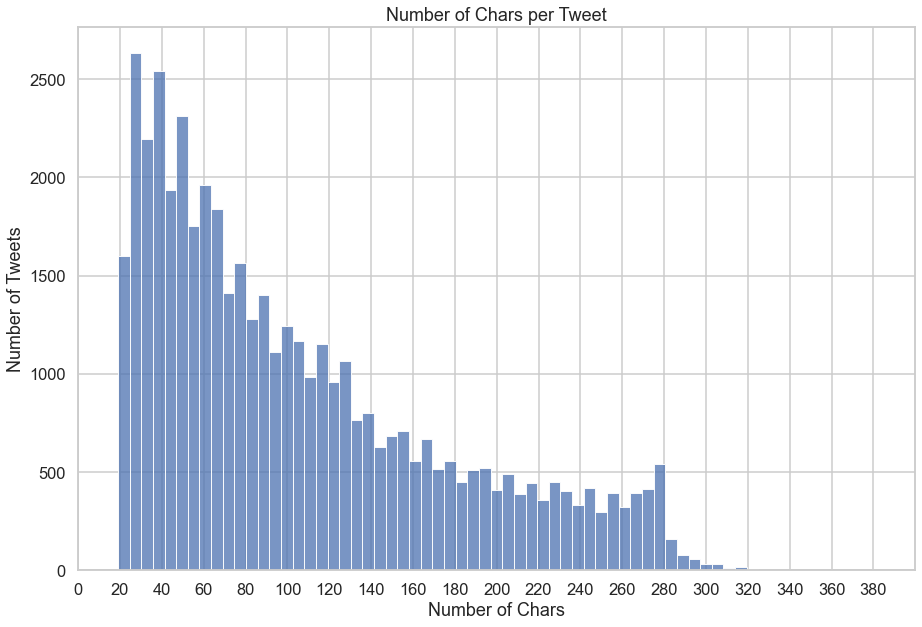

In [34]:
sns.histplot(df['text'].str.len())
plt.xticks(list(range(0, 400, 20)))
plt.xlim(0, 400)
plt.xlabel('Number of Chars')
plt.ylabel('Number of Tweets')
plt.title('Number of Chars per Tweet');

###### Quick recap: we don't have any tweets with less than 20 chars because if they did not have adjectives/adverbs in them, they were dropped. Otherwise, the original tweet was prepended to them (if it's a reply, else dropped as well). That's why we have a few tweets that are over the 280 mark.

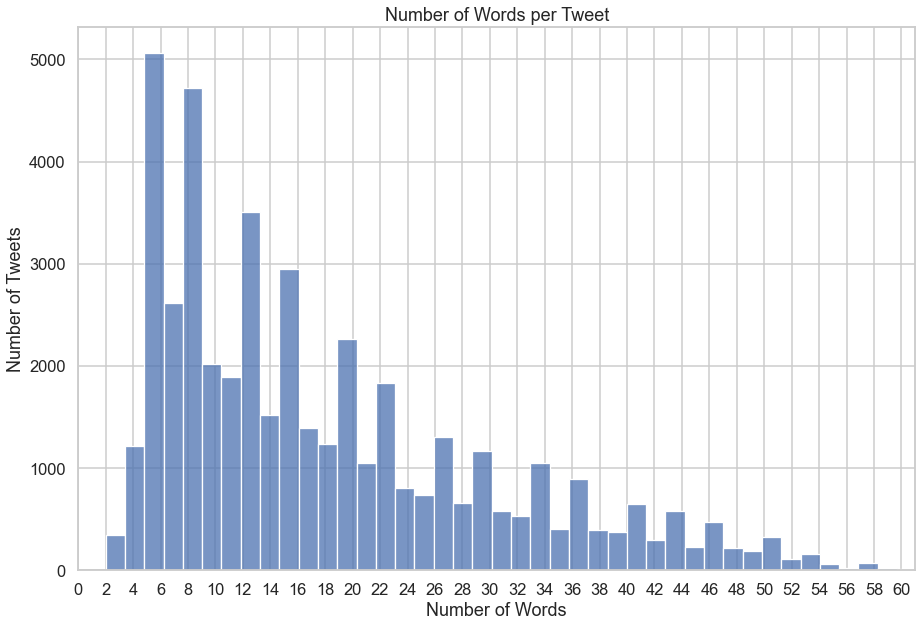

count   45944.000
mean       18.017
std        12.051
min         2.000
25%         8.000
50%        15.000
75%        25.000
max        85.000
Name: text, dtype: float64


In [35]:
stats_descrp = df.text.str.split().map(lambda words: len(words)).describe()
sns.histplot(df.text.str.split().map(lambda words: len(words)), bins=59)
plt.xticks(list(range(0, 61, 2)))
plt.xlim(0, 61)
plt.xlabel('Number of Words')
plt.ylabel('Number of Tweets')
plt.title('Number of Words per Tweet')
plt.show()
print(stats_descrp)

###### Majority of the tweets that we will have to perform sentiment analysis are somewhat short.

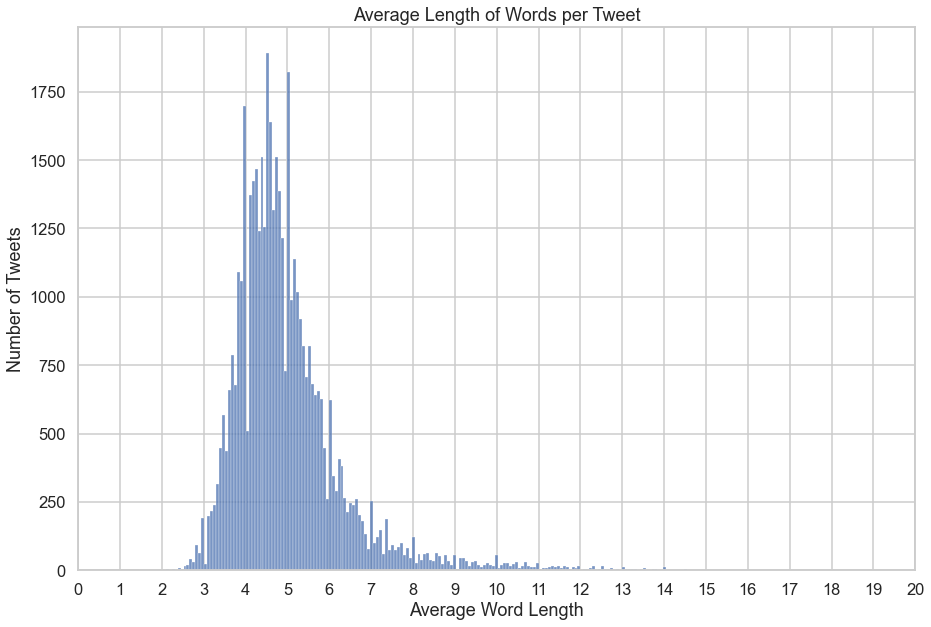

In [36]:
sns.histplot(df.text.str.split().map(lambda words: sum(len(word) for word in words)/len(words)))
plt.xticks(list(range(0, 30, 1)))
plt.xlim(0, 20)
plt.xlabel('Average Word Length')
plt.ylabel('Number of Tweets')
plt.title('Average Length of Words per Tweet');

In [37]:
stop_words = set(STOPWORDS)
def plot_wordlcloud(corp):
    word_cloud = WordCloud(background_color='white', stopwords=stop_words, max_words=100, max_font_size=30, scale=3, random_state=5)
    word_cloud = word_cloud.generate(str(corp))
    plt.axis('off')
    plt.imshow(word_cloud)
    plt.show()

In [38]:
def get_corpus(dataframe):
    text = dataframe['text'].str.split().values.tolist()
    return [word for row in text for word in row]

corpus1 = get_corpus(df)

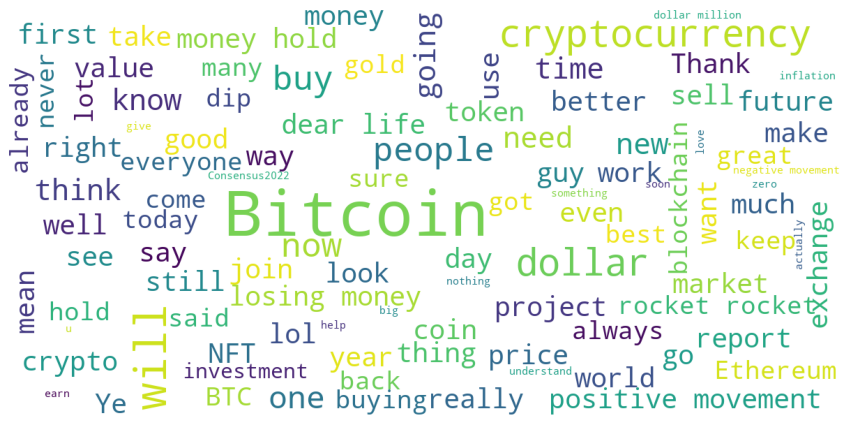

In [39]:
plot_wordlcloud(' '.join(corpus1))

###### Great, we can see that out text pipeline does a decent job of sorting out spam and converting the majority of slang into words. It is easy to see the common theme of these words. Now let's explore other features of tweets like retweet_count, like_count, and other.

##### First let's look at the number of tweets we have per day. Our earliest tweets are dated April 10th, while earliest tweets & replies are dated June 6 (because Twitter api allows to extract comments for last 7 days only), so our count for tweets per day is going to be highly skewed. Therefore, I will plot tweets and tweets & replies on two different graphs.

In [48]:
df.loc[df['tweet_created'].dt.date == datetime.date(2022, 6, 21)]

,tweet_created,conversation_id,tweet_id,author_id,text,retweet_count,reply_count,like_count,quote_count,account_created,account_id,name,verified,follower_count,following_count,tweet_count,listed_count,uniqueness_%
69299,2022-06-21 15:06:15+00:00,1539262985645981697,1539263433967042562,62206530,Twitter board recommends shareholders accept E...,0,0,5,0,2009-08-02 05:44:59+00:00,62206530,Carissa,0,196,324,980,3,100
70372,2022-06-21 00:51:19+00:00,1539025132852764674,1539048282705563648,1498037320104259590,Did a bunch of research. Tell me how I did :fa...,0,2,6,0,2022-02-27 20:48:36+00:00,1498037320104259590,Rweems30241,0,296,464,2321,0,92
70374,2022-06-21 00:45:48+00:00,1539025132852764674,1539046892834897926,1460913057551437826,making comedy out of graphics is quite somethi...,0,1,2,0,2021-11-17 10:10:04+00:00,1460913057551437826,XT_Español,0,730,479,1516,8,82
70375,2022-06-21 00:40:31+00:00,1539025132852764674,1539045564062519301,3189188215,1-FORTA Airdrop 100 dollar usdt Free :fire: 2-...,0,0,0,0,2015-05-08 21:32:24+00:00,3189188215,Anwar Zaib,0,125,52,4039,8,100
70383,2022-06-21 00:24:54+00:00,1539025132852764674,1539041633903292416,39515572,Bitcoin stacking stats :flexed_biceps_medium-...,0,1,7,0,2009-05-12 14:54:45+00:00,39515572,Marco Méndez,0,1330,2230,124753,17,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88043,2022-06-21 19:17:15+00:00,1539305669928669190,1539326600340193280,1287057962155094018,"so cool, never stop evolving",0,0,2,0,2020-07-25 16:11:56+00:00,1287057962155094018,odious,0,25917,971,20520,286,100
88045,2022-06-21 19:09:00+00:00,1539305669928669190,1539324523635298306,1333917637068242944,if you want some sh*tty old trucks to paint IR...,0,0,2,0,2020-12-01 23:35:46+00:00,1333917637068242944,Artie Handz | 🖼💎🙌🏻.eth,0,8863,4016,8962,94,100
88047,2022-06-21 18:03:18+00:00,1539305669928669190,1539307989001089026,1317225065411346432,"yesssss lets go, good investment ahhhhhh this ...",0,0,0,0,2020-10-16 22:05:14+00:00,1317225065411346432,Jen (Decentralized!*k) || Mint Snakes,0,14682,3758,17512,159,90
88049,2022-06-21 17:57:48+00:00,1539305669928669190,1539306607338786818,432093,how much more epic can you get??,0,0,0,0,2007-01-02 04:52:46+00:00,432093,BT,1,622334,1256,17231,4425,100


In [46]:
tweets_comments_per_day = df.loc[df['tweet_created'].dt.date >= datetime.date(2022, 6, 5)].tweet_created.dt.strftime('%d').value_counts().sort_index().reset_index(name='counts')
tweets_per_day_before_june = df.loc[(df['tweet_created'].dt.date < datetime.date(2022, 6, 5))].tweet_created.dt.strftime('%m_%d').value_counts().sort_index().reset_index(name='counts')

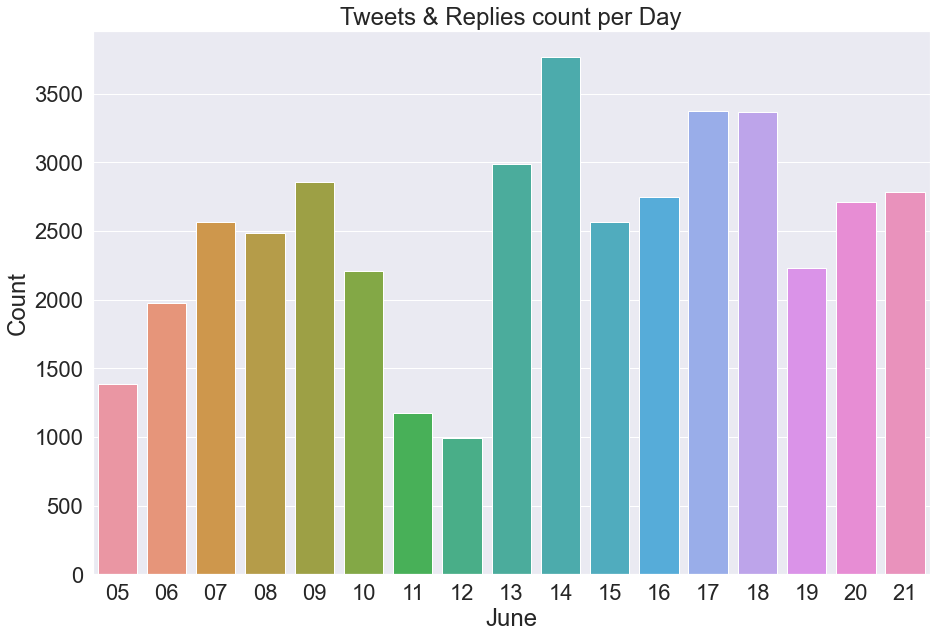

In [47]:
# period of time when i was able to extract tweets and comments
sns.barplot(x='index', y='counts', data=tweets_comments_per_day)
sns.set(font_scale = 2)
plt.title('Tweets & Replies count per Day')
plt.ylabel('Count')
plt.xlabel('June');

###### These are numbers for tweets and comments for the period of June 6 to June 17. We have large numbers of tweets collected because most of them are replies to the original tweets. NOTE: we are only looking at four different accounts.

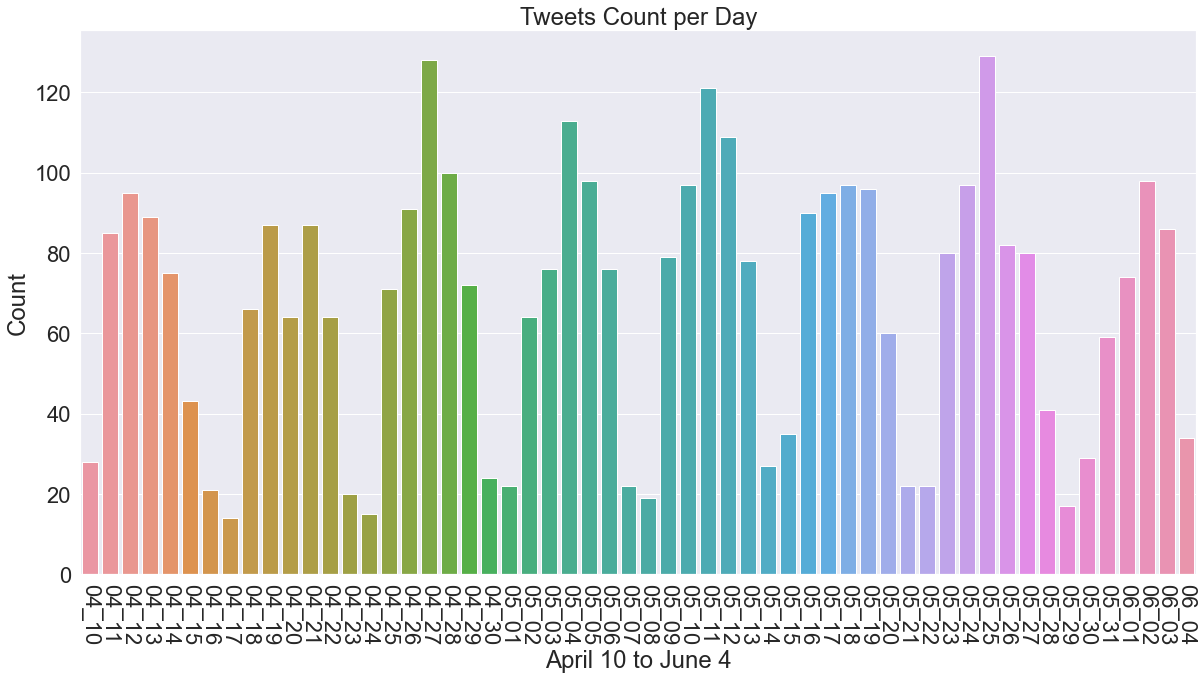

In [43]:
plt.figure(figsize=(20,10))
sns.barplot(x='index', y='counts', data=tweets_per_day_before_june)
plt.xticks(rotation=-90)
plt.title('Tweets Count per Day')
plt.ylabel('Count')
plt.xlabel('April 10 to June 4');

###### These are only original tweets that were extracted from the same four accounts from the period of April 10 to June 4. We can observe seasonality on this plot. It is clear that on the weekends, admins of the account do not post as match. Unfortunately, we can observe this on the other graph because we have not collected enough information yet.

In [19]:
num_cols = df.columns[df.dtypes == 'int64'].tolist()

In [20]:
corr = df[num_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220, 255, as_cmap=True)

<AxesSubplot:>

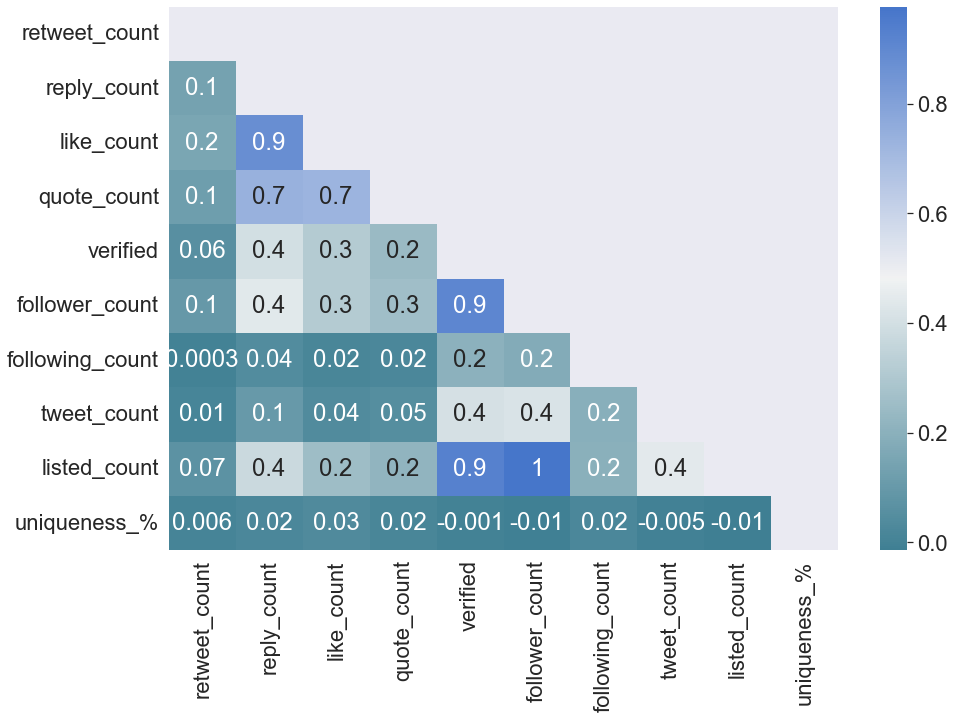

In [21]:
sns.heatmap(data=corr, mask=mask, annot=True, cmap=cmap, fmt='.1g')